In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import os
import json
import spacy
import nltk
import emoji
import re
from datetime import datetime

In [2]:
nlp = spacy.load("es_core_news_sm")

In [3]:
list_dfs = []
path= os.path.join('..','Data','EmpresaElectricaDeLaHabana')
d = len(os.listdir(path))-1
primer = 2022

for i in range(primer,primer+d):
    path_ = os.path.join(path,str(i))
    for j in os.listdir(path_):
        df = pd.read_json(os.path.join(path_,j))
        list_dfs.append(df)
    

In [4]:
df = pd.concat(list_dfs)

In [5]:
df.shape

(40239, 11)

In [6]:
df.head()

,text,sender_id,date,bot,views,message_id,is_reply,reply_to,reactions,total_reactions,photo_path
0,⚡️👷La principal causa de #interrupción eléctri...,-1001392909520,2022-11-30 22:52:06+00:00,NaN,8250,5493,False,NaN,"{'👍': 10, '🤬': 5}",15,NaN
1,"📌 Estimados clientes del municipio Playa,el co...",-1001392909520,2022-11-30 22:43:45+00:00,NaN,7803,5492,False,NaN,"{'🤬': 18, '👍': 4}",22,NaN
2,📌Disparo automático por frecuencia(DAF). Un di...,-1001392909520,2022-11-30 22:00:28+00:00,NaN,8062,5491,False,NaN,{'👍': 11},11,NaN
3,"📌 Estimados clientes ,el municipio San Miguel ...",-1001392909520,2022-11-30 21:58:51+00:00,NaN,7808,5490,False,NaN,{'👍': 9},9,NaN
4,"📌Estimados clientes del municipio Lisa,los con...",-1001392909520,2022-11-30 21:41:28+00:00,NaN,7983,5489,False,NaN,"{'👍': 9, '🤬': 5}",14,NaN


In [7]:
df['bot'].isnull().sum() == df.shape[0]

np.True_

In [8]:
df['reply_to'].isnull().sum() == df.shape[0]

np.False_

In [ ]:
df.isnull().sum()

In [9]:
np.unique(df['sender_id'])

array([-1001392909520])

In [10]:

print('max',df['views'].max())
print('min: ',df['views'].min())


max 320625
min:  454


In [11]:
print('max',df['total_reactions'].max())
print('min: ',df['total_reactions'].min())


max 4345
min:  0


In [12]:
df = df.drop(columns=['bot'])

In [13]:
df

,text,sender_id,date,views,message_id,is_reply,reply_to,reactions,total_reactions,photo_path
0,⚡️👷La principal causa de #interrupción eléctri...,-1001392909520,2022-11-30 22:52:06+00:00,8250,5493,False,NaN,"{'👍': 10, '🤬': 5}",15,NaN
1,"📌 Estimados clientes del municipio Playa,el co...",-1001392909520,2022-11-30 22:43:45+00:00,7803,5492,False,NaN,"{'🤬': 18, '👍': 4}",22,NaN
2,📌Disparo automático por frecuencia(DAF). Un di...,-1001392909520,2022-11-30 22:00:28+00:00,8062,5491,False,NaN,{'👍': 11},11,NaN
3,"📌 Estimados clientes ,el municipio San Miguel ...",-1001392909520,2022-11-30 21:58:51+00:00,7808,5490,False,NaN,{'👍': 9},9,NaN
4,"📌Estimados clientes del municipio Lisa,los con...",-1001392909520,2022-11-30 21:41:28+00:00,7983,5489,False,NaN,"{'👍': 9, '🤬': 5}",14,NaN
...,...,...,...,...,...,...,...,...,...,...
1800,NOTA INFORMATIVA\n\nEELH| En el día de ayer NO...,-1001392909520,2026-01-01 12:21:13+00:00,34267,50545,False,NaN,"{'👍': 303, '👎': 125}",428,Data/photos/EmpresaElectricaDeLaHabana/2026/01...
1801,📣Averías existentes hasta el momento\n\n🚨Averí...,-1001392909520,2026-01-01 11:12:49+00:00,34072,50544,False,NaN,"{'👎': 50, '👍': 15}",65,NaN
1802,🚧📉Informamos que por Disparado Automático por ...,-1001392909520,2026-01-01 11:06:47+00:00,34766,50543,False,NaN,"{'👎': 86, '👍': 18}",104,NaN
1803,"🚨‼️Consumidores del municipio Arroyo Naranjo,l...",-1001392909520,2026-01-01 08:51:21+00:00,36134,50542,False,NaN,"{'👎': 55, '👍': 16}",71,NaN


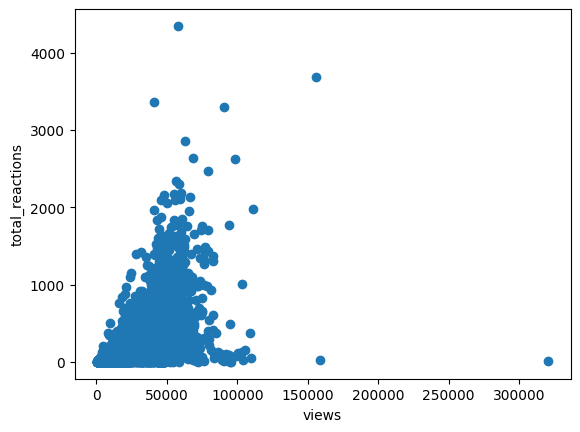

In [14]:
plt.scatter(df['views'],df['total_reactions'])
plt.xlabel("views")
plt.ylabel('total_reactions')
plt.show()

In [15]:
corr  = df[['views','total_reactions']].corr()
corr

,views,total_reactions
views,1.000000,0.559208
total_reactions,0.559208,1.000000


In [ ]:
df['text'] = df['text'].map(lambda x: x.lower())

In [85]:
df[df['date']>datetime(year=2026,month=1,day=1)]

TypeError: Invalid comparison between dtype=datetime64[us, UTC] and datetime